# Exploring Artificial Intelligence

*See accompanying blogpost [here](https://jontysinai.github.io/jekyll/update/2017/11/11/the-perceptron.html)*

A foray into artificial intelligence, with the help of math, history and Python.  
by _Jonty Sinai_


## Section 1: Foundations of Machine Learning
## Part 2: The Perceptron

We will explore an evolution of the MCP Neuron, discussed in Part 1, artificial neuron known as the Perceptron, which was introduced by the psychologist Frank Rosenblatt in 1957. The Perceptron extended the MCP Neuron model by incorporating a simple learning algorithm, which could learn a set of weights, instead of having to pre-programme the weights.

### Reminder: The MCP Neuron

As a reminder, recall the mathematical model of the MCP Neuron:

![](../Assets/mcp-neuron-graph.png)

* $m$ binary input signals, $\ x_1, x_2, ..., x_m \in \{0,1\}$.
* A set of binary _weights_ for each input, $\ w_1, w_2, ..., w_m \in \{-1,0,1\}$.
* An _activation function_, $\ f:\{0,1\}^{m} \to \{0,1\}$.
* A threshold value; an integer $\ t \in \mathbb{Z}^{*}$.
* An output signal, $\ y \in \{0,1\}$, such that $\ y = f(x_1, x_2, ..., x_m)$

For the MCP Neuron, the activation function was the *Heaviside step function*:

$$
y = \left\{
\begin{array}{l}
1, \ \text{if} \ \sum_{i=1}^{m}w_{i}x_{i} \geq t,\\[3pt]
0, \ \text{otherwise}
\end{array}
\right.
$$

### The Perceptron Model

The Perceptron extends the MCP Neuron model above, first by allowing the input signals and weights to take values in $\ \mathbb{R}^m$. The output signals are still, for the moment, binary, but taking value $\ y \in \{-1,1\}$, instead of from $\ \{0,1\}$. This is a minor detail which we make for computational convenience. 

The significant change, however, is the incorporation of a *learning algorithm* to learn the weights. In particular, the Perceptron is a supervised learning problem where we have *training data* with the correct input and output values. If there are $N$ *training examples*, then our training data takes the form:

$$
\ (\mathbf{x}_n, y_n) \in \mathbb{R}^{m}\times\{-1,1\}, \ \ \forall \ n = 1,2, ..., N
$$. 

For a given training example, $\ \mathbf{x}_n$, a *prediction* is made using the Heaviside step function, as before.

Then the learning algorithm is follows:

1. Initialise the weights vector, $\ \mathbf{w}$ either to zero or with random, small values.
2. For $\ n = 1,2, ..., N$:
    1. Calculate the predicted label for $\ \mathbf{x}_n$ using $\ \mathbf{w}$:
    
    $$
    \hat{y_n} = \left\{
    \begin{array}{l}
        1, \ \text{if} \ \mathbf{w}^T\mathbf{x}_n \geq t,\\[3pt]
        -1, \ \text{otherwise}
    \end{array}
    \right.
    $$
    
    2. Update the weights vector using the *update rule*:
    
    $$
    \mathbf{w} := \mathbf{w} + \Delta\mathbf{w}
    $$
    
    where 
    
    $$
    \Delta\mathbf{w} = \alpha(y_n - \hat{y_n})\mathbf{x}_n
    $$
    
    The parameter $\alpha > 0$ is called the *learning rate* and controls the sensitivity of the updates to incorrect predictions. For more on the intuition behind the learning rate, see the accompanying blogpost.
    
[Image of the Perceptron model here]

As a technical note, the decision boundary of the hyperplane $\ \mathbf{w}^T\mathbf{x}$ is restricted to passing through the origin. So to avoid this, and thus increase the range of motion of the decision boundary, we add an extra *intercept* term, $\ x_0 = 1$ to each training example, and corresponding $\ w_0$ in the weights vector.


To get a feeling for the intuition behind the update rule, consider separately the cases when a correct prediction is made, when a positive label is misclassified and when a negative label is misclassified:

* **Correct prediction:** In this case, $\ y_n = \hat{y_n}$, so 

    $$
    \Delta\mathbf{w} = \alpha(0)\mathbf{x}_n = 0
    $$
    
    Thus the weights remain unchanged.
    
    
* **Incorrect negative prediction:**

    $$
    \Delta\mathbf{w} = \alpha(1 - (-1))\mathbf{x}_n = \alpha(2)\mathbf{x}_n
    $$
    
    In this case, the weights are increased by a positive factor of $\ 2$, thereby pushing the prediction $\ \mathbf{w}^T\mathbf{x}_n$ in a positive direction.
    
    
* **Incorrect positive prediction:**

    $$
    \Delta\mathbf{w} = \alpha(-1 - (1))\mathbf{x}_n = \alpha(-2)\mathbf{x}_n
    $$
    
    In this case, the weights are increased by a negative factor of $\ -2$, thereby pushing the prediction $\ \mathbf{w}^T\mathbf{x}_n$ in a positive direction.

### The Perceptron in Python

In [174]:
import numpy as np

class Perceptron(object):
    """Perceptron binary classifier.
    
    Learns a decision boundery to classify data as either positive or negative.
    
    
    Parameters
    ----------
    alpha : float
            Learning rate.
    epochs : integer
             Number of passes over the training data.
                
    Attributes
    ----------
    w_ : array-like, shape = [1, m]
         Learned weights
    errors : list of integers
             number of misclassifications made in each epoch.
             
    """
    def __init__(self, alpha = 0.01, epochs = 10):
        self.alpha = alpha
        self.epochs = epochs
        
        
    def predict(self, x):
            """Heaviside activation function."""
            return np.where(np.dot(self.w_.T, x) >= 0, 1, -1)
        
        
    def learn(self, X, y):
        """
        Implements the Perceptron learning algorithm to learn the weights for
        the Perceptron classifier.
        
        Parameters
        ----------
        X : array-like, shape = [N, m]
            Training example inputs.
        y : array-like, shape = [N, 1]
            Training example labels.
        
        Returns
        -------
        self: object
        
        """
        
        m = X.shape[1]
        N = X.shape[0]
        
        self.w_ = np.zeros([1 + m, 1])
        self.errors_ = []
        
        X = np.concatenate((np.ones([N,1]), X), axis = 1) #append column of 1's to X (intercepts)
        
        for _ in range(self.epochs):
            errors = 0
            
            for x_n, y_n in zip(X,y):
                x_n = x_n.reshape((m+1, 1))
                update = self.alpha*(y_n - self.predict(x_n))*x_n
                self.w_ += update
                errors += np.sum(update != 0.0)/(m+1)
                
            self.errors_.append(errors)
            
        return self
    

In [175]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

y = iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = iris.iloc[0:100, [0,2]].values

model = Perceptron(alpha = 0.1, epochs = 10)
model.learn(X,y)

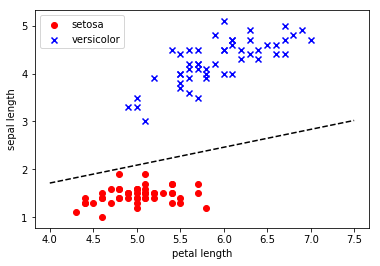

In [196]:
import matplotlib.pyplot as plt

# scatter plot of iris data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')

# decision boundary, using formula for 1D hyperplane
xx = np.linspace(4, 7.5)
a = -model.w_[0]/model.w_[2]
b = -model.w_[1]/model.w_[2]
yy = a + b*xx

plt.plot(xx, yy, '--', color = 'black')

plt.show()

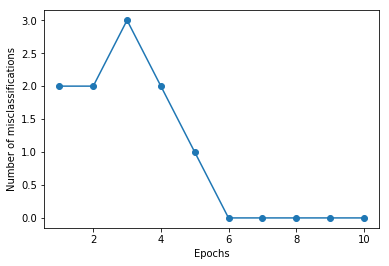

In [177]:
plt.plot(range(1, len(model.errors_) + 1), model.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()